# House Prices Research Notebook

**About** \
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home. \

Decription file located in /data..

In [11]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append("drive/MyDrive/colab_notebooks/kaggle_house_prices/")
import support as sup

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/colab_notebooks/kaggle_house_prices/data/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/colab_notebooks/kaggle_house_prices/data/test.csv')
df_sample = pd.read_csv('/content/drive/MyDrive/colab_notebooks/kaggle_house_prices/data/sample_submission.csv')

# EDA

There are 1460 instances of training data and 1460 of test data. Total number of attributes equals 81, of which 36 is quantitative, 43 categorical + Id and SalePrice.

**Quantitative**: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

**Qualitative**: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities,

In [78]:
# 81 features in total
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [72]:
# target
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

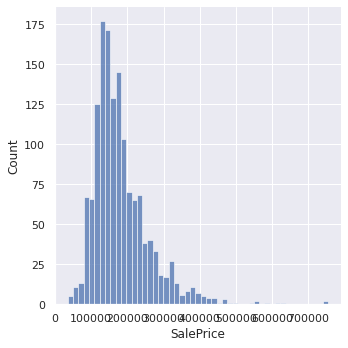

In [73]:
# target distribution
sns.displot(df_train['SalePrice'])

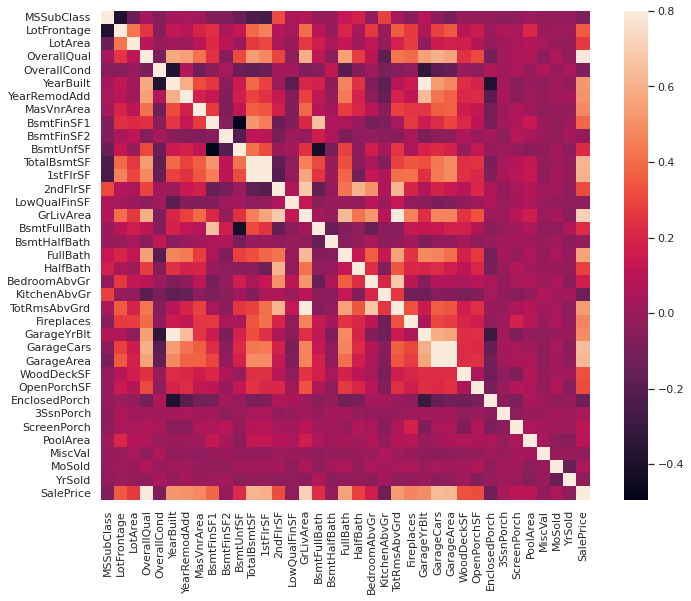

In [74]:
# correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
display(sns.heatmap(corrmat, vmax=.8, square=True))

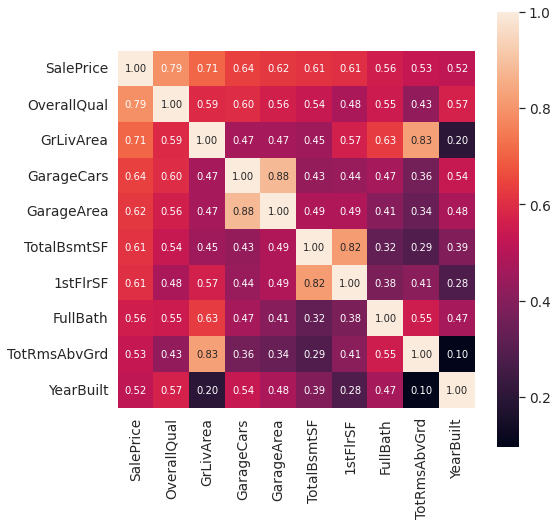

In [75]:
# corr matrix by top-10 correlated with target
cols = corrmat.nlargest(10, 'SalePrice').index
cm = df_train[cols].corr()
sns.set(font_scale=1.25)
display(sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}))

&uarr; Looking through heatmap based on top correlated with target features \
we can highlight there are few pairs of correlated features like:
- GarageCars and GarageArea - let's take second only
- TotalBsmtSF and 1stFlrSF - let's take first

In [76]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], height = 2.5)

Error in callback <function flush_figures at 0x7ff941473b00> (for post_execute):


KeyboardInterrupt: ignored

**Missing Data**

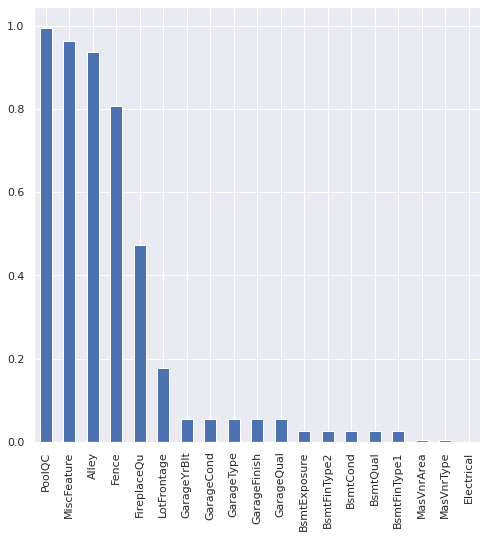

In [77]:
# nulls percent
missing_data = df_train.isna().sum().sort_values(ascending=False) / len(df_train)
missing_data[missing_data > 0].plot(kind='bar')

# Data Processing

In [49]:
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [51]:
df_train = df_train.drop(columns='Id')
df_test = df_test.drop(columns='Id')

Due to SalePrice doesn't satisfy normal distribution by skewing to the left we need to apply log1p to remove skewness

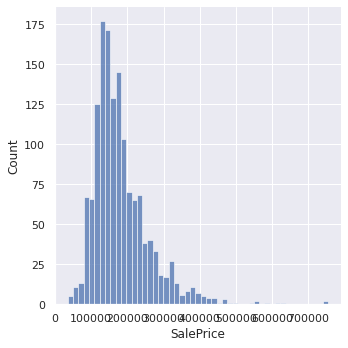

In [53]:
sns.displot(df_train.SalePrice)

In [59]:
y_train = np.log1p(df_train['SalePrice'])

train_features = df_train.drop(columns='SalePrice')
test_features = df_test

That looks really better!

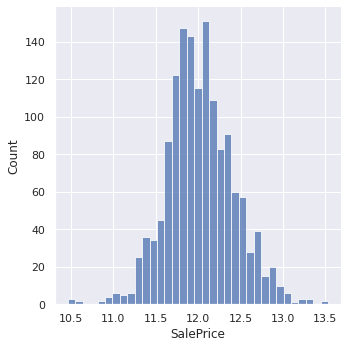

In [58]:
sns.displot(y_train)

# Baseline

In [85]:
train_features[cat_features] = train_features[cat_features].astype(str)

In [66]:
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score

In [86]:
model = CatBoostRegressor(cat_features=cat_features).fit(train_features, y_train)

986:	learn: 0.0546417	total: 34.8s	remaining: 459ms
987:	learn: 0.0545834	total: 34.9s	remaining: 423ms
988:	learn: 0.0545744	total: 34.9s	remaining: 388ms
989:	learn: 0.0545077	total: 34.9s	remaining: 353ms
990:	learn: 0.0544685	total: 35s	remaining: 317ms
991:	learn: 0.0544089	total: 35s	remaining: 282ms
992:	learn: 0.0544016	total: 35s	remaining: 247ms
993:	learn: 0.0543883	total: 35.1s	remaining: 212ms
994:	learn: 0.0543724	total: 35.1s	remaining: 176ms
995:	learn: 0.0543311	total: 35.1s	remaining: 141ms
996:	learn: 0.0542762	total: 35.2s	remaining: 106ms
997:	learn: 0.0542026	total: 35.2s	remaining: 70.5ms
998:	learn: 0.0541564	total: 35.2s	remaining: 35.3ms
999:	learn: 0.0541387	total: 35.3s	remaining: 0us


In [79]:
cat_features = ['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']